# MNIST Classifier

Practice implementation of this [example](https://github.com/amygdala/tensorflow-workshop/blob/master/workshop_sections/mnist_series/mnist_simple.py) 🙏

In [1]:
# Import Dependancies
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from six.moves import xrange
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [2]:
# Import Data
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

In [3]:
# Configure matplotlib
%matplotlib inline

# Configure random
# make a random seed
random.seed()

In [4]:
# Declare variables
data_dir = '/tmp/MNIST_data'

# number of steps to iterate to
num_steps = 10000

# size of each batch of training examples to learn
batch_size = 100

# size of our image when it is not flattened
# the example comes flattened as (784)
# it's actually (28,28)
xl = 28
xw = 28
xShape = xl * xw

# our label is 1-hot encoded so it's shape is (1, num_categories)
yShape = 10

In [5]:
# Split Data into a training and test set
data = read_data_sets(data_dir, one_hot=True)
training_data = data.train
test_data = data.test

Extracting /tmp/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# Explore data
# explore_data(data, 4)

In [7]:
# Declare placeholders
# we want to have our input, x (784) go into 1 neuron
# which outputs, y (10)
# the neuron should be a linear equation such as:
# y_ = x * W + b

# placeholder for image
x = tf.placeholder(tf.float32, [None, xShape])
# placeholder for label
y_ = tf.placeholder(tf.float32, [None, yShape])

# we need weights to to adjust
# which will be initialized near zero
# [xShape, yShape]
W = tf.Variable(tf.zeros([xShape, yShape]))

# we need bais, b for out model
b = tf.Variable(tf.zeros([yShape]))

In [8]:
# Display an example as an image
def display_image(example):
    """explore the mnist dataset by plotting it as an image. data: the mnist dataset, n: the example to readt from 0 - dataset.size"""
    # Plot it as an image
    # by turning it into a numpy array
    # then reshaping it into 2D of size (28, 28)
    print("Example:")
    np_example = np.array(example)
    np_example_2d = np.reshape(np_example, (xl, xl))

    plt.imshow(np_example_2d, cmap='gray')
    plt.show()

In [9]:
# Define Evaluation function
def evaluate_model(evaluate, test_data):
    model_accuracy = sess.run(
        evaluate,
        feed_dict={
            x: test_data.images,
            y_: test_data.labels
        }
    )

    accuracy_percent = model_accuracy * 100
    # Log out data
    print("accuracy: %s%%" % accuracy_percent)

In [10]:
# Exploration of image set data
def explore_data(data, n):
    """explore the mnist dataset by logging an image, and label. data: the mnist dataset, n: the example to readt from 0 - dataset.size"""
    # Log a chunk of data
    # Log 1 image from the training data
    # Log 1 label from the training data
    training_image = data.train.images[n]
    training_label = data.train.labels[n]
    np_training_image = np.array(training_image)

    print('Training Example', n, ':', np_training_image)
    print('Training Example Label', n, ':', training_label)

In [11]:
# Define Prediction function
def predict(data, n, prediction):
    actual_y = data.labels[n]
    acutal_label = np.argmax(actual_y)
    example_x = data.images[n]
    example_x_2d = np.reshape(np.array(example_x), (-1, 784))

    example_prediction = sess.run(
        prediction,
        feed_dict={
            x: example_x_2d
        }
    )

    # grab the prediction inside the array
    prediction_formatted = example_prediction[0]
    
    print("prediction: %s " % prediction_formatted)
    print("label: %s " % acutal_label)
    display_image(example_x)

In [28]:
# Define make random predictions
def random_prediction(data, n, prediction):
    # generate a set of n, random integers 
    random_set = random.sample(range(1, 10000), n)
    print("Random set used: %s " % random_set)
    # make predictions
    for i in random_set:
        predict(data, i, prediction)
        print("-------------------------------------------")

In [13]:
# Define training function
def train_model(batch_size, num_steps, training_data, training_func):
    print("Training for %s steps" % num_steps)

    for _ in xrange(num_steps):
        # grab a batch
        batch_xs, batch_ys = training_data.next_batch(batch_size)

        # run a session with the training function
        # feed in the training data
        sess.run(training_func, feed_dict={
            x: batch_xs,
            y_: batch_ys
        })

In [14]:
# Operations
# ---------------------------------------------------------------

# Define Model
y = tf.matmul(x, W) + b

# Define Loss and optimizer operation
# we use logits with our softmax cross entropy
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        logits=y,
        labels=y_
    )
)

# Define training operation
# we use gradient descent to train the algorithm
train = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)    

# Define what a correct_prediction is (operation)
# the category we predict should be the category of the example
# determine if the prediction is correction
correct_prediction = tf.equal(
    tf.argmax(y, 1), 
    tf.argmax(y_, 1)
)

# Define how we will evaluate our model (operation)
# calculate the reduced mean of our prediction
evaluate = tf.reduce_mean(
    tf.cast(
        correct_prediction,
        tf.float32
    )
)

# Define how we will get the prediction
prediction = tf.argmax(y, 1)

In [15]:
# ---------------------------------------------------------------
# Start TF session
# initialize variables
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()    

# Train Model
train_model(
    batch_size,
    num_steps,
    training_data,
    train
)

Training for 10000 steps


In [16]:
# Evaluate the Model
evaluate_model(
    evaluate,
    test_data
)

accuracy: 92.4700021744%


prediction: 1 
label: 1 
Example:


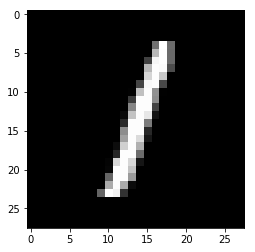

In [17]:
# Make a prediction
predict(
    test_data,
    1025,
    prediction
)

Random set used: [2944, 4217, 9464, 6823, 6638] 
prediction: 0 
label: 0 
Example:


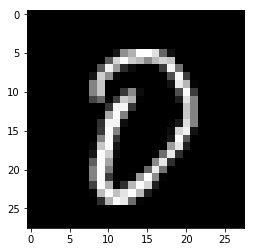

-------------------------------------------
prediction: 4 
label: 4 
Example:


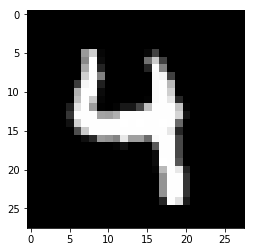

-------------------------------------------
prediction: 1 
label: 1 
Example:


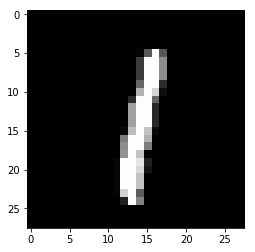

-------------------------------------------
prediction: 5 
label: 5 
Example:


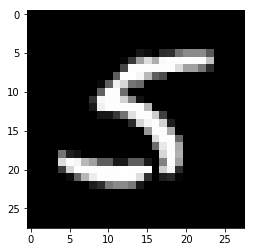

-------------------------------------------
prediction: 5 
label: 5 
Example:


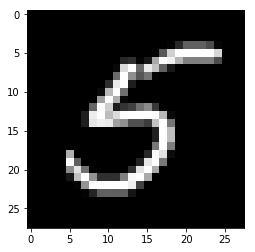

-------------------------------------------


In [29]:
# Make random predictions
random_prediction(
    test_data,
    5,
    prediction
)